In [1]:
#data manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame

#visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#read in data from excel
WageData = pd.read_excel('WageData.xls')

#assign regions based on http://www.infoplease.com/ipa/A0770177.html
#create dictionary to do so
d = {'Connecticut':'New England','Maine':'New England','Massachusetts':'New England',
     'New Hampshire':'New England','Rhode Island':'New England','Vermont':'New England',
    'Delaware':'Mid Atlantic','Maryland':'Mid Atlantic','New Jersey':'Mid Atlantic',
     'New York':'Mid Atlantic','Pennsylvania':'Mid Atlantic', 'D.C.':'Mid Atlantic',
    'Alabama':'South','Arkansas':'South','Florida':'South','Georgia':'South','Kentucky':'South',
     'Louisiana':'South','Mississippi':'South','Missouri':'South','North Carolina':'South',
    'South Carolina':'South','Tennessee':'South','Virginia':'South','West Virginia':'South',
    'Illinois':'Midwest','Indiana':'Midwest','Iowa':'Midwest','Kansas':'Midwest','Michigan':'Midwest','Minnesota':'Midwest',
     'Nebraska':'Midwest','North Dakota':'Midwest','Ohio':'Midwest','South Dakota':'Midwest','Wisconsin':'Midwest',
    'Arizona':'Southwest','New Mexico':'Southwest','Oklahoma':'Southwest','Texas':'Southwest',
    'Alaska':'West','California':'West','Colorado':'West','Hawaii':'West','Idaho':'West','Montana':'West','Nevada':'West',
     'Oregon':'West','Utah':'West','Washington':'West','Wyoming':'West'}

In [3]:
WageData.head()

,State,X2014,X2013,X2012,X2011,X2010,X2009,X2008,X2007,X2006,...,X1993,X1992,X1991,X1990,X1989,X1988,X1987,X1986,X1985,X1984
0,United States,53657,52789,52605,52690,53507.155196,54925,55313,57357,56598,...,50421,50667,51086,52623,53306,52372,51973,51329,49574,48664
1,Alabama,42278,42058,44817,44833,44447.482178,44115,48905,48199,44563,...,40480,42682,41285,41049,39250,38373,39355,39443,38480,37581
2,Alaska,67629,62137,65629,60456,62814.202071,67975,70362,71927,66246,...,69287,69133,68868,69064,66399,63679,66275,64645,73007,70246
3,Arizona,49254,51430,48508,51182,50921.943047,50470,51586,53911,54785,...,49241,48553,52123,51360,52653,50852,53345,52572,50117,46514
4,Arkansas,44922,40572,40233,43477,41899.550171,40317,43528,46581,43513,...,37183,39497,39740,40045,39525,38804,37546,38615,36629,34029


In [4]:
##CLEAN DATA
#extract column indexes for melt function
ColumnNames = list(WageData.columns)
ColumnNames.remove('State')

# Transpose data to long format
WageData = pd.melt(WageData, 
                   id_vars='State', 
                   value_vars=ColumnNames, var_name = 'Year', value_name = "Income")

#Remove unnecessary X character at the beginning of each Year string
WageData['Year'] = WageData['Year'].str[1:5]

#Map regions from dictionary
WageData['Region'] = WageData['State'].map(d)

In [5]:
WageData.head()

,State,Year,Income,Region
0,United States,2014,53657.0,NaN
1,Alabama,2014,42278.0,South
2,Alaska,2014,67629.0,West
3,Arizona,2014,49254.0,Southwest
4,Arkansas,2014,44922.0,South


In [6]:
#create US dataframe
USdata = WageData[WageData.State == "United States"].copy()

#create US baseline from 1984 and add to dframe
USbase = USdata[USdata.Year == '1984']
USbase = USbase.get_value(1560, "Income")
USdata['Baseline'] = USbase

#calculate percent change in income for each year as compared to 1984 baseline
USdata['pct_change'] = ((USdata.Income-USdata.Baseline)/USdata.Baseline)*100

#Grab data for overall us growth by 2014
US2014 = USdata[USdata.Year == '2014'].copy()

In [7]:
USdata.head()

,State,Year,Income,Region,Baseline,pct_change
0,United States,2014,53657.000000,NaN,48664.0,10.260151
52,United States,2013,52789.000000,NaN,48664.0,8.476492
104,United States,2012,52605.000000,NaN,48664.0,8.098389
156,United States,2011,52690.000000,NaN,48664.0,8.273056
208,United States,2010,53507.155196,NaN,48664.0,9.952234


In [8]:
#create state dataframe
statedata = WageData[WageData.State != "United States"].copy()

#create baseline for states
statebase = statedata[statedata.Year == '1984'].copy()
statebase['Baseline'] = statebase['Income']
del statebase['Year']
del statebase['Income']
del statebase['Region']

#merge baseline into main dataset
statedata = pd.merge(statedata,statebase, on = 'State')

#calculate percent change in income for each year as compared to 1984 baseline
statedata['pct_change'] = ((statedata.Income - statedata.Baseline)/statedata.Baseline)*100

#filter for Ohio, D.C., and Nevada
OhioData = statedata[statedata.State == 'Ohio'].copy()
DCdata = statedata[statedata.State == 'D.C.'].copy()
Nevadadata = statedata[statedata.State == 'Nevada'].copy()
MaryData = statedata[statedata.State == 'Maryland'].copy()
MissData = statedata[statedata.State == 'Mississippi'].copy()


In [9]:
statedata.head()

,State,Year,Income,Region,Baseline,pct_change
0,Alabama,2014,42278.000000,South,37581.0,12.498337
1,Alabama,2013,42058.000000,South,37581.0,11.912935
2,Alabama,2012,44817.000000,South,37581.0,19.254410
3,Alabama,2011,44833.000000,South,37581.0,19.296985
4,Alabama,2010,44447.482178,South,37581.0,18.271153


In [10]:
#create staterank dataframe for best and worst state in terms of income growth from 1984
staterank = statedata[statedata.Year == '2014'].copy()
staterank = staterank.sort_values(by = "pct_change",ascending=False)
staterank['Rank'] = np.arange(1,52)
rank_remain = staterank[(staterank.Rank >= 6) &
                         (staterank.Rank <= 46)]
staterank = staterank[(staterank.Rank < 6) |
                      (staterank.Rank > 46)]



state_index = [248,1054,465,93,899,496,1085,434,31,868]

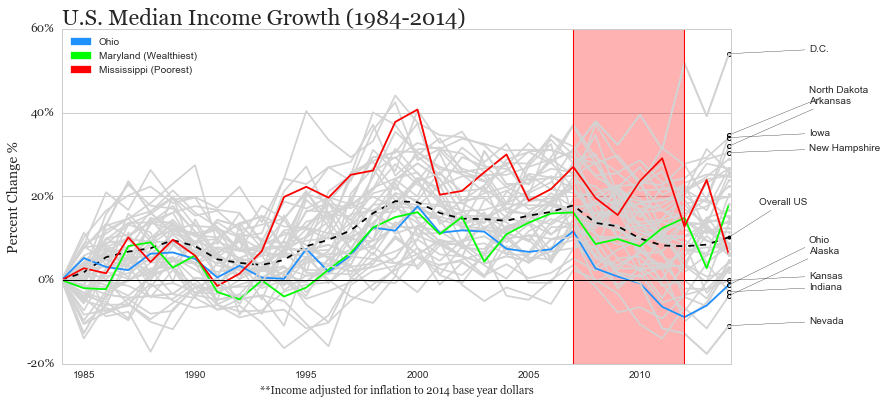

In [12]:
#create figure object
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)

#loop through and plot each state as background grey color
States = np.unique(statedata['State'])

for state in States:
    ax1.plot(statedata['Year'][statedata.State == state], statedata['pct_change'][statedata.State == state],
         linestyle = '-', color = 'lightgrey')
    
#plot states that need emphasized as well as end markers for those states
ax1.plot(USdata['Year'],USdata['pct_change'],linestyle = 'dashed', color = 'black')
ax1.plot(OhioData['Year'],OhioData['pct_change'], linestyle = '-',color = 'dodgerblue')
ax1.plot(MaryData['Year'],MaryData['pct_change'], linestyle = '-',color = 'lime')
ax1.plot(MissData['Year'],MissData['pct_change'], linestyle = '-',color = 'red')
ax1.plot(staterank['Year'], staterank['pct_change'], linestyle='', marker='o', color = 'black', markersize=4, 
                                                                                                markeredgewidth = 1, 
                                                                                                markeredgecolor = 'black', 
                                                                                                markerfacecolor = 'None')
ax1.plot(rank_remain['Year'], rank_remain['pct_change'], linestyle='', marker= 'o', color='lightgrey', markersize = 3)
ax1.plot(US2014['Year'], US2014['pct_change'], linestyle='', marker = 'o', color = 'black', markersize = 4)
ax1.plot(DCdata['Year'],DCdata['pct_change'], linestyle = '-',color = 'lightgrey')
ax1.plot(Nevadadata['Year'],Nevadadata['pct_change'], linestyle = '-',color = 'lightgrey')


ax1.axhline(y=0, linewidth=1, color = 'black')

#Get data for us marker
USyear = US2014.get_value(0, 'Year')
USpct = US2014.get_value(0, 'pct_change')
ax1.annotate('Overall US', xy = (USyear, USpct ), xytext=(30,30),
        textcoords = 'offset points', ha = 'left', va = 'bottom', 
            arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

#chart aesthetics
csfont = {'fontname':'Georgia'}
plt.title('U.S. Median Income Growth (1984-2014)', fontsize=22, **csfont, loc = 'left')
#plt.xlabel('Year',fontsize=14, **csfont)
plt.ylabel('Percent Change %',fontsize=14, **csfont)
plt.xlabel('**Income adjusted for inflation to 2014 base year dollars', **csfont)
plt.xlim(1984,2014.1)
ax1.grid(b=False, axis = 'x')
ax1.axvspan(2007, 2012, alpha=0.3, color='red')
ax1.axvline(x=2007, linewidth = 1, color = 'red')
ax1.axvline(x=2012, linewidth = 1, color = 'red')
plt.yticks([-20,0,20,40,60], fontsize=12, **csfont)
fmt = '%.0f%%'
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
blueline = mpatches.Patch(color='dodgerblue', label = 'Ohio')
redline = mpatches.Patch(color='red', label = 'Mississippi (Poorest)')
greenline = mpatches.Patch(color='lime',label = 'Maryland (Wealthiest)')
ax1.legend(handles=[blueline,greenline, redline], loc=2)


for i in state_index:
    x= staterank.get_value(i,'Year')
    y= staterank.get_value(i,'pct_change')
    label = staterank.get_value(i,'State')
    rank = staterank.get_value(i,'Rank')
    if rank % 2 == 0:
        xval = 80
        yval = 40
    else:
        xval = 80
        yval = 0
    ax1.annotate(label,
               xy = (x, y), xytext = (xval,yval), 
               textcoords = 'offset points', ha = 'left', va = 'bottom', 
               arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))


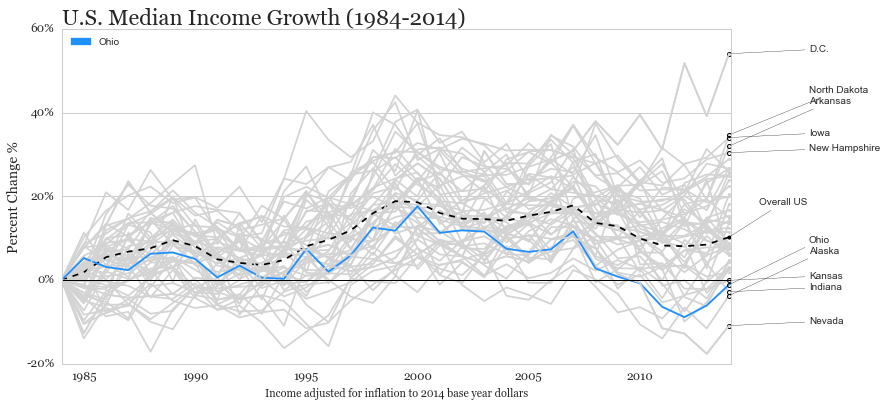

In [13]:
#same code minus some aesthetics
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)

States = np.unique(statedata['State'])

for state in States:
    ax1.plot(statedata['Year'][statedata.State == state], statedata['pct_change'][statedata.State == state],
         linestyle = '-', color = 'lightgrey')
    

ax1.plot(USdata['Year'],USdata['pct_change'],linestyle = 'dashed', color = 'black')
ax1.plot(OhioData['Year'],OhioData['pct_change'], linestyle = '-',color = 'dodgerblue')
ax1.plot(staterank['Year'], staterank['pct_change'], linestyle='', marker='o', color = 'black', markersize=4, 
                                                                                                markeredgewidth = 1, 
                                                                                                markeredgecolor = 'black', 
                                                                                                markerfacecolor = 'None')
ax1.plot(rank_remain['Year'], rank_remain['pct_change'], linestyle='', marker= 'o', color='lightgrey', markersize = 3)
ax1.plot(US2014['Year'], US2014['pct_change'], linestyle='', marker = 'o', color = 'black', markersize = 4)
ax1.plot(DCdata['Year'],DCdata['pct_change'], linestyle = '-',color = 'lightgrey')
ax1.plot(Nevadadata['Year'],Nevadadata['pct_change'], linestyle = '-',color = 'lightgrey')


ax1.axhline(y=0, linewidth=1, color = 'black')

USyear = US2014.get_value(0, 'Year')
USpct = US2014.get_value(0, 'pct_change')
ax1.annotate('Overall US', xy = (USyear, USpct ), xytext=(30,30),
        textcoords = 'offset points', ha = 'left', va = 'bottom', 
            arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

csfont = {'fontname':'Georgia'}
plt.title('U.S. Median Income Growth (1984-2014)', fontsize=22, **csfont, loc = 'left')
#plt.xlabel('Year',fontsize=14, **csfont)
plt.ylabel('Percent Change %',fontsize=14, **csfont)
plt.xlabel('Income adjusted for inflation to 2014 base year dollars', **csfont)
plt.xlim(1984,2014.1)
plt.xticks(fontsize = 12, **csfont)
plt.yticks([-20,0,20,40,60], fontsize=12, **csfont)
fmt = '%.0f%%'
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter(fmt))
ax1.grid(b=False, axis = 'x')
plt.yticks()
blueline = mpatches.Patch(color='dodgerblue', label = 'Ohio')
ax1.legend(handles=[blueline], loc=2)


for i in state_index:
    x= staterank.get_value(i,'Year')
    y= staterank.get_value(i,'pct_change')
    label = staterank.get_value(i,'State')
    rank = staterank.get_value(i,'Rank')
    if rank % 2 == 0:
        xval = 80
        yval = 40
    else:
        xval = 80
        yval = 0
    ax1.annotate(label,
               xy = (x, y), xytext = (xval,yval), 
               textcoords = 'offset points', ha = 'left', va = 'bottom', 
               arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))
